# TFRecord 만들기

In [8]:
# 개와 고양이 binary classification 예제의 TFRecord 버전

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm.notebook import tqdm
from PIL import Image
import io

############ Tensorflow에서 제공된 Type별 Feature 생성 코드 ############

def _bytes_feature(value):
    # string / byte 타입을 받아서 byte list를 리턴.
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    # float / double 타입을 받아서 float list를 리턴
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _floatarray_feature(array):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=array))

def _int64_feature(value):
    # bool / enum / int / uint 타입을 받아서 int64 list를 리턴
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _validate_text(text):
    """If text is not str or unicode, then try to convert it to str."""
    if isinstance(text, str):
        return text
    elif isinstance(text, 'unicode'):
        return text.encode('utf8', 'ignore')
    else:
        return str(text)

# DataFrame을 하나 생성해요!
# DataFrame의 column은 2개를 사용해요. (경로포함한 filename, label)

src = 'C:/Users/s_csmscox/jupyterSave/dvc/train/0/'

df1 = pd.DataFrame(os.listdir(src),
                  columns=['filename'])

df1['label'] = ~df1['filename'].str.contains('cat')

df1 = df1.astype({'label' : 'int'})

df1['filename'] = df1['filename'].map(lambda x : src + x)

src = 'C:/Users/s_csmscox/jupyterSave/dvc/train/1/'

df2 = pd.DataFrame(os.listdir(src),
                  columns=['filename'])

df2['label'] = ~df2['filename'].str.contains('cat')

df2 = df2.astype({'label' : 'int'})

df2['filename'] = df2['filename'].map(lambda x : src + x)

df = pd.concat([df1, df2])

display(df)

### TFRecord 생성 함수 ###

# id_list : 이미지 파일명을 가지고 있는 list
# label_list : 이미지 파일의 label을 가지고 있는 list
# tfrecords_name : tfrecord 파일의 이름(train, validation용도로 파일을 따로 만들어야 하기 때문)

def to_tfrecords(id_list, label_list, tfrecords_name):
    print("converting 시작!!")

    options = tf.io.TFRecordOptions(compression_type='GZIP')

    with tf.io.TFRecordWriter(path=os.path.join(tfrecords_name + '.tfrecords'),
                              options=options) as writer:

        for id_, label_ in tqdm(zip(id_list,label_list),
                                total=len(id_list),
                                position=0,
                                leave=True):
            image_path = id_  # 이미지의 경로
            _binary_image = tf.io.read_file(image_path)  # 이미지 파일로부터 binary 데이터를 추출

            my_features = tf.train.Features(feature={
                'image_raw': _bytes_feature(_binary_image),
                'label': _int64_feature(label_),
                'id': _bytes_feature(id_.encode())
            })

            string_set = tf.train.Example(features=my_features)

            writer.write(string_set.SerializeToString())


to_tfrecords(df['filename'],df['label'],'cat_dog_train')

,filename,label
0,C:/Users/s_csmscox/jupyterSave/dvc/train/0/cat...,0
1,C:/Users/s_csmscox/jupyterSave/dvc/train/0/cat...,0
2,C:/Users/s_csmscox/jupyterSave/dvc/train/0/cat...,0
3,C:/Users/s_csmscox/jupyterSave/dvc/train/0/cat...,0
4,C:/Users/s_csmscox/jupyterSave/dvc/train/0/cat...,0
...,...,...
7495,C:/Users/s_csmscox/jupyterSave/dvc/train/1/dog...,1
7496,C:/Users/s_csmscox/jupyterSave/dvc/train/1/dog...,1
7497,C:/Users/s_csmscox/jupyterSave/dvc/train/1/dog...,1
7498,C:/Users/s_csmscox/jupyterSave/dvc/train/1/dog...,1


converting 시작!!


In [10]:
src = 'C:/Users/s_csmscox/jupyterSave/dvc/valid/0/'

df1 = pd.DataFrame(os.listdir(src),
                  columns=['filename'])

df1['label'] = ~df1['filename'].str.contains('cat')

df1 = df1.astype({'label' : 'int'})

df1['filename'] = df1['filename'].map(lambda x : src + x)

src = 'C:/Users/s_csmscox/jupyterSave/dvc/valid/1/'

df2 = pd.DataFrame(os.listdir(src),
                  columns=['filename'])

df2['label'] = ~df2['filename'].str.contains('cat')

df2 = df2.astype({'label' : 'int'})

df2['filename'] = df2['filename'].map(lambda x : src + x)

df = pd.concat([df1, df2])

display(df)

to_tfrecords(df['filename'],df['label'],'cat_dog_valid')

,filename,label
0,C:/Users/s_csmscox/jupyterSave/dvc/valid/0/cat...,0
1,C:/Users/s_csmscox/jupyterSave/dvc/valid/0/cat...,0
2,C:/Users/s_csmscox/jupyterSave/dvc/valid/0/cat...,0
3,C:/Users/s_csmscox/jupyterSave/dvc/valid/0/cat...,0
4,C:/Users/s_csmscox/jupyterSave/dvc/valid/0/cat...,0
...,...,...
2495,C:/Users/s_csmscox/jupyterSave/dvc/valid/1/dog...,1
2496,C:/Users/s_csmscox/jupyterSave/dvc/valid/1/dog...,1
2497,C:/Users/s_csmscox/jupyterSave/dvc/valid/1/dog...,1
2498,C:/Users/s_csmscox/jupyterSave/dvc/valid/1/dog...,1


converting 시작!!


# TFRecord 불러오기

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# train, validation TFRecord 파일 경로
train_tfrecord_path = 'C:/Users/s_csmscox/jupyterSave/dvc/cat_dog_train.tfrecords'
valid_tfrecord_path = 'C:/Users/s_csmscox/jupyterSave/dvc/cat_dog_valid.tfrecords'

# TFRecord 파일을 불러와서 모델 학습 및 추론에 사용하기 위해서는 
# tf.data.Dataset 모듈과 유사한 기능을 가지는 tf.data.TFRecordDataset 모듈을 이용
# tf.data.Dataset 모듈은 여러 방식으로 데이터를 불러올 수 있는데 기본적으로는 
# generator로 부터 데이터를 불러온다. TFRecordDataset도 마찬가지임.
# 아래의 parameter는 TFRecordDataset를 사용할 때의 parameter

BUFFER_SIZE = 256     # 데이터 shuffle을 위한 buffer size
BATCH_SIZE = 20       # 배치 사이즈. 한번에 가져오는 이미지 데이터 개수 
NUM_CLASS = 2         # class의 개수. binary인 경우는 필요없으며 categorical인 경우 설정
IMAGE_SIZE = 224       


# TFRecord를 읽어서 데이터를 복원하기 위한 자료구조.
image_feature_description = {
    'image_raw': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'id': tf.io.FixedLenFeature([], tf.string),
}

# 읽어들인 TFRecord를 다음의 형태(dict)로 변환하는 함수
# <ParallelMapDataset shapes: {id: (), image_raw: (), label: ()}, 
#                     types: {id: tf.string, image_raw: tf.string, label: tf.int64}>
def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, 
                                      image_feature_description)

# 위에서 얻은 ParallelMapDataset를 다음의 형태(shape)로 변환하는 함수
# <ParallelMapDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
def map_func(target_record):
    img = target_record['image_raw']
    label = target_record['label']
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.dtypes.cast(img, tf.float32)
    return img, label


# 전처리(resize & augmentation) 함수
# 이미지 데이터 normalization
# 이 처리를 하는 대신 tf.keras.applications.mobilenet.preprocess_input() 함수를 이용하는것이 좋음
# 우리예제는 TFRecord 생성 시 원본 size로 저장했기 때문에 image resize를 해야함.
def image_resize_func(image, label):
    result_image = tf.image.resize(image, (IMAGE_SIZE,IMAGE_SIZE))  
    return result_image, label


# 각각의 pretrained network마다 
# tensorflow.keras.applications.mobilenet.preprocess_input(image) 작업을 수행해야 함.
# 이부분에 대해서는 조금 더 알아봐야 함.
# 만약 multinomial classification이기 때문에 one_hot처리도 필요함.
def post_process_func(image, label):
    result_image = image

#    result_image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
#    result_image = tf.keras.applications.mobilenet.preprocess_input(image)    
    onehot_label = tf.one_hot(label, depth=2)    # binary인 경우 one_hot 사용안함.    
    return result_image, onehot_label
#    return result_image, label

    
    
train_dataset = tf.data.TFRecordDataset(train_tfrecord_path, 
                                  compression_type='GZIP')
train_dataset = train_dataset.map(_parse_image_function, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.map(map_func, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)


# dataset shuffle 처리
train_dataset = train_dataset.shuffle(BUFFER_SIZE)

# 전처리(resize & auigmentation)
train_dataset = train_dataset.map(image_resize_func, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

# BatchDataset으로 변환
# <BatchDataset shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>
# BatchDataset으로 변환하기 전에 image의 resize(전처리)가 일어나야 한다. 그렇지 않으면 
# shape이 달라 batch처리가 되지 않는다는 오류 발생.
train_dataset = train_dataset.batch(BATCH_SIZE).repeat()

# pretrained network의 preprocess_input() 호출
# one_hot encoding 처리
train_dataset = train_dataset.map(post_process_func, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

# prefetch처리
# prefetch는 전처리와 학습과정의 모델 실행을 오버랩.
# 모델이 s스텝 학습을 실행하는 동안 입력 파이프라인은 s+1스텝의 데이터를 읽어서 수행속도를 높임.
# <PrefetchDataset shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)







valid_dataset = tf.data.TFRecordDataset(valid_tfrecord_path, 
                                  compression_type='GZIP')
valid_dataset = valid_dataset.map(_parse_image_function, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_dataset = valid_dataset.map(map_func, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

valid_dataset = valid_dataset.cache()
# dataset shuffle 처리
valid_dataset = valid_dataset.shuffle(BUFFER_SIZE)

# 전처리(resize & auigmentation)
valid_dataset = valid_dataset.map(image_resize_func, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

# BatchDataset으로 변환
# <BatchDataset shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>
# BatchDataset으로 변환하기 전에 image의 resize(전처리)가 일어나야 한다. 그렇지 않으면 
# shape이 달라 batch처리가 되지 않는다는 오류 발생.
valid_dataset = valid_dataset.batch(BATCH_SIZE).repeat()

# pretrained network의 preprocess_input() 호출
# one_hot encoding 처리
valid_dataset = valid_dataset.map(post_process_func, 
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

# prefetch처리
# prefetch는 전처리와 학습과정의 모델 실행을 오버랩.
# 모델이 s스텝 학습을 실행하는 동안 입력 파이프라인은 s+1스텝의 데이터를 읽어서 수행속도를 높임.
# <PrefetchDataset shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>
valid_dataset = valid_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)



# 모델 학습

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0

np.random.seed(42)

# 모델 구축

# EfficientNetB0 모델 불러오기
pre_trained_model = EfficientNetB0(include_top=False, weights='imagenet',
                                  input_shape=(224, 224, 3))
pre_trained_model.trainable = False
pre_trained_model.summary()

# EfficientNetB0 모델에 덧붙이기
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(2048, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-7), loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              256905216 
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 271,445,669
Trainable params: 267,396,098
Non-trainable params: 4,049,571
__________________________________

In [4]:
#모델 학습
early_stopping = EarlyStopping(patience = 3) # 조기종료 콜백함수 정의

# 데이터 개수 / batch_size
steps_per_epoch = 15000 / BATCH_SIZE
val_steps = 5000 / BATCH_SIZE

histroy = model.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=30,
                    validation_data=valid_dataset,
                    validation_steps=val_steps,
                    callbacks=[early_stopping],
                    verbose=1
                    )

Epoch 1/30
750/750 [==============================] - 59s 79ms/step - loss: 0.2582 - accuracy: 0.9031 - val_loss: 0.5119 - val_accuracy: 0.7448
Epoch 2/30
750/750 [==============================] - 65s 86ms/step - loss: 0.1334 - accuracy: 0.9547 - val_loss: 0.1879 - val_accuracy: 0.9346
Epoch 3/30
750/750 [==============================] - 65s 86ms/step - loss: 0.0757 - accuracy: 0.9779 - val_loss: 0.1209 - val_accuracy: 0.9568
Epoch 4/30
750/750 [==============================] - 63s 85ms/step - loss: 0.0529 - accuracy: 0.9857 - val_loss: 0.0957 - val_accuracy: 0.9654
Epoch 5/30
750/750 [==============================] - 62s 82ms/step - loss: 0.0412 - accuracy: 0.9884 - val_loss: 0.0817 - val_accuracy: 0.9708
Epoch 6/30
750/750 [==============================] - 60s 80ms/step - loss: 0.0317 - accuracy: 0.9919 - val_loss: 0.0734 - val_accuracy: 0.9736
Epoch 7/30
750/750 [==============================] - 61s 81ms/step - loss: 0.0267 - accuracy: 0.9931 - val_loss: 0.0678 - val_accuracy:

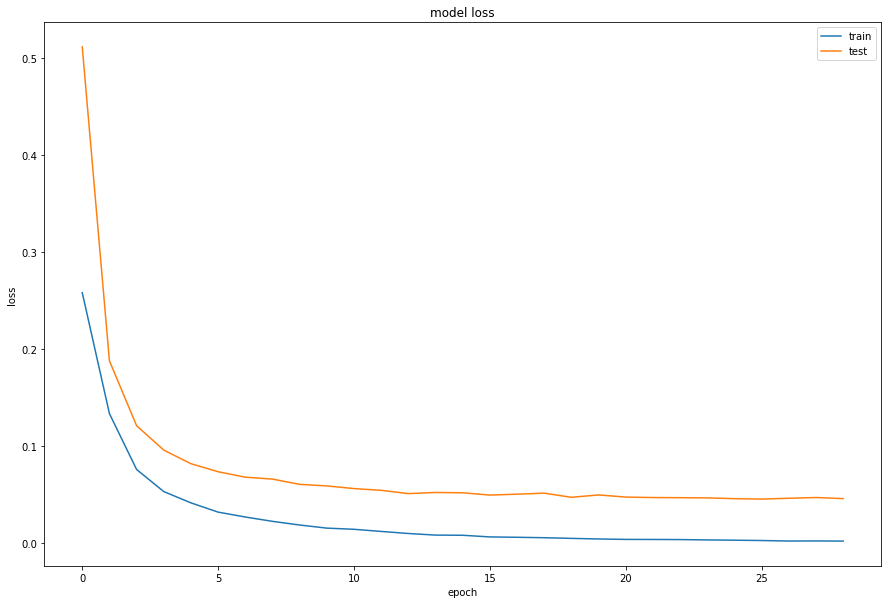

train loss= 0.0017914620693773031
validation loss= 0.045651912689208984


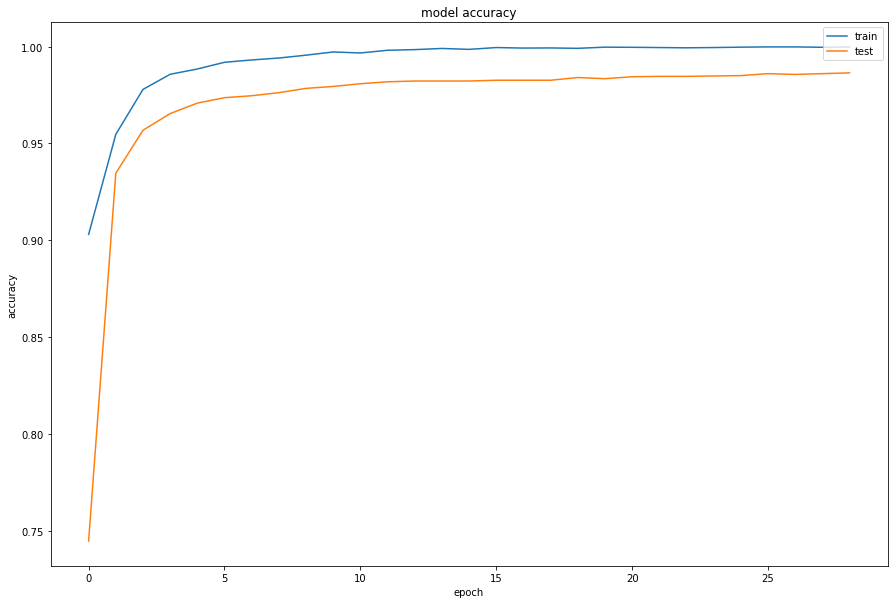

train accuracy= 0.9998000264167786
validation accuracy= 0.9864000082015991


In [5]:
# 학습 곡선을 나타내는 함수
def plot_loss_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train loss=", history.history['loss'][-1])
    print("validation loss=", history.history['val_loss'][-1])
    
def plot_acc_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train accuracy=", history.history['accuracy'][-1])
    print("validation accuracy=", history.history['val_accuracy'][-1])
    
plot_loss_curve(histroy)
plot_acc_curve(histroy)

In [ ]:
model.save('C:/Users/s_csmscox/jupyterSave/dvc/dvc_EfficientNetB0_224')

In [6]:
import pathlib
import os,glob
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical

directory = 'C:/Users/s_csmscox/jupyterSave/dvc/test'
categories = ["0","1"] # dog = 1, cat = 0
nb_classes = len(categories)

w = 224
h = 224

X = []
y = []

for idx, obj in enumerate(categories):

    image_dir = directory + "/" + obj
    files = glob.glob(image_dir+"/*.jpg")
    print(obj, " 파일 길이 : ", len(files))
    
    for i, f in enumerate(files):
        img = Image.open(f)
        
        # 사이즈 조절
        img = img.resize((w, h))
        
        img = np.asarray(img)
        img = img.reshape(w,h,3)

        X.append(img)
        y.append(idx)

        if i % 10000 == 0:
            print(obj, " : ", f)
            
X_test = np.array(X)

y_test = np.array(y)
y_test = to_categorical(y_test)

0  파일 길이 :  2500
0  :  C:/Users/s_csmscox/jupyterSave/dvc/test/0\cat.7500.jpg
1  파일 길이 :  2500
1  :  C:/Users/s_csmscox/jupyterSave/dvc/test/1\dog.7500.jpg


In [7]:
# 모델 평가
print("-- Evaluate --")
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
157/157 [==============================] - 7s 45ms/step - loss: 0.0404 - accuracy: 0.9870
accuracy: 98.70%
